### <h3> Zomato Restaurant Profiling

<h4> Business Problem : </h4>

- 'The Roastery Coffee House' is one of the restaurant that is associated with Zomato , the owner of the restaurant has approached Zomato requesting them to analyze the performance of the restaurant and provide some insights.
- Zomato has given you some data and asked you to carry out the task.
- The objective is to analyze the data and present the insights to the restaurant owner , it should be presented in the form of a static dashboard

---

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

---

Read Data

In [2]:
df = pd.read_csv('https://bit.ly/36FO9ii')
df.head()

,date,rating,res_id,res_name,rev_count,rev_id,rev_name,text
0,2019-03-17 22:18:50,Rated 5.0,18716525,Aura Cafe,"153 Reviews , 250 Followers",1226687,Hussain Abbas,RATED Aura has to be my Beautiful Breakfast p...
1,2019-03-16 21:25:52,Rated 3.0,18716525,Aura Cafe,"33 Reviews , 86 Followers",27912218,Sunakshi Gupta,RATED A decent place to come over for chit ch...
2,2019-03-16 10:18:04,Rated 4.0,18716525,Aura Cafe,"41 Reviews , 200 Followers",38270346,Bhavya Thamban,RATED Everything is good about this place exc...
3,2019-03-14 09:13:01,Rated 5.0,18716525,Aura Cafe,"49 Reviews , 500 Followers",39225454,Lovely Sharma,RATED Aura Cafe has a good ambiance with outd...
4,2019-03-12 09:44:34,Rated 3.0,18716525,Aura Cafe,"306 Reviews , 1974 Followers",553112,Raghav Peddi 'The Food Shaukeen',NaN


---

<h5> Extract only the data of  'The Roastery Coffee House' from the given data

In [3]:
df = df[df['res_name']=='The Roastery Coffee House']
df.head(2)

,date,rating,res_id,res_name,rev_count,rev_id,rev_name,text
1294,2019-03-16 08:57:44,Rated 5.0,18544039,The Roastery Coffee House,"16 Reviews , 13 Followers",51111834,Mahmoud Shaik,RATED It was my first time I was really hungr...
1295,2019-03-13 00:40:24,Rated 4.0,18544039,The Roastery Coffee House,"73 Reviews , 355 Followers",37216070,Srobanti Majumdar,RATED The ambience is good but the food is no...


In [4]:
df.shape

(167, 8)

<h5> We now have 167 records and 8 columns

<h5> Missing Ratio

In [5]:
mr = (df.isna().sum()/len(df))*100
pd.DataFrame(mr.sort_values(ascending=False) , columns=['Missing Ratio'])

,Missing Ratio
text,55.688623
rev_name,43.712575
rev_count,43.712575
rev_id,0.000000
res_name,0.000000
res_id,0.000000
rating,0.000000
date,0.000000


In [6]:
df.fillna('NA',inplace=True)

---

<h4> Exploratory Analysis

---

<h5> Granularity : </h5>

  - Each record is a review and rating given to the restaurant by a particular user at a given time
  
<h5> Data Types : </h5>

  - The types of data we have :
      - Numaric , DateTime & Text 
 
<h5> Business Use-Case: </h5>

  - The restaurant 'The Roastery Coffee House's profiling

<h5> Types of Analysis that can be done : </h5>

   - Distribution Analysis
   - Text Analysis
   - Trend Analysis

---

<h4> Data Cleaning

---

Extract Date values

In [7]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['time'] = df['date'].dt.time

Split rating

In [8]:
df['rating'] = df['rating'].apply(lambda x: x.split(' ')[1])

Split user-reviews and  user-followers

In [10]:
df['user_reviews'] = df['rev_count'].apply(lambda x: x.split(',')[0])
df['user_reviews'] = df['user_reviews'].apply(lambda x: x.split(' ')[0])

In [11]:
df['user_followers']= df['rev_count'][df['rev_count']!='NA'].apply(lambda x: x.split(',')[1])
df['user_followers'] = df['user_followers'].fillna('NA')

In [12]:
df['user_followers'] = df['user_followers'][df['user_followers']!='NA'].apply(lambda x: x.split(' ')[1])

In [13]:
df.drop('rev_count',1,inplace=True)

In [31]:
df.head()

,date,rating,res_id,res_name,rev_id,rev_name,text,year,month,time,user_reviews,user_followers
1294,2019-03-16 08:57:44,5.0,18544039,The Roastery Coffee House,51111834,Mahmoud Shaik,RATED It was my first time I was really hungr...,2019,3,08:57:44,16,13
1295,2019-03-13 00:40:24,4.0,18544039,The Roastery Coffee House,37216070,Srobanti Majumdar,RATED The ambience is good but the food is no...,2019,3,00:40:24,73,355
1296,2019-03-10 23:49:31,5.0,18544039,The Roastery Coffee House,39216844,Rameez Siddiqui,NaN,2019,3,23:49:31,164,1818
1297,2019-03-10 16:09:41,5.0,18544039,The Roastery Coffee House,494087,Prashant Laxman,RATED The 4.8 rating drew me to this place. A...,2019,3,16:09:41,20,218
1298,2019-03-10 10:55:32,5.0,18544039,The Roastery Coffee House,32560419,That Biryani Gal,NaN,2019,3,10:55:32,217,848


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 1294 to 1460
Data columns (total 12 columns):
date              167 non-null datetime64[ns]
rating            167 non-null object
res_id            167 non-null int64
res_name          167 non-null object
rev_id            167 non-null int64
rev_name          167 non-null object
text              167 non-null object
year              167 non-null int64
month             167 non-null int64
time              167 non-null object
user_reviews      167 non-null object
user_followers    94 non-null object
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 17.0+ KB


In [15]:
df['rating'] = df['rating'].astype(float)

In [36]:
df['user_reviews'].fillna('NA' ,inplace=True)

---

<h4> Restaurant Profiling - The Roastery Coffee House

---

In [16]:
df.head(2)

,date,rating,res_id,res_name,rev_id,rev_name,text,year,month,time,user_reviews,user_followers
1294,2019-03-16 08:57:44,5.0,18544039,The Roastery Coffee House,51111834,Mahmoud Shaik,RATED It was my first time I was really hungr...,2019,3,08:57:44,16,13
1295,2019-03-13 00:40:24,4.0,18544039,The Roastery Coffee House,37216070,Srobanti Majumdar,RATED The ambience is good but the food is no...,2019,3,00:40:24,73,355


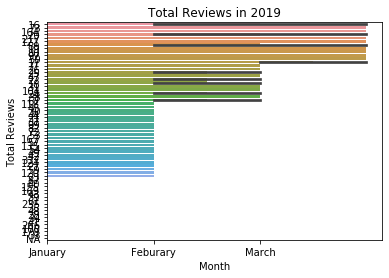

In [38]:
sns.barplot(df['month'][df['year']==2019] , df['user_reviews'] )
plt.xlabel('Month')
plt.ylabel('Total Reviews')
plt.title('Total Reviews in 2019')
plt.xticks([0,1,2],labels=['January','Feburary','March'])
plt.show()

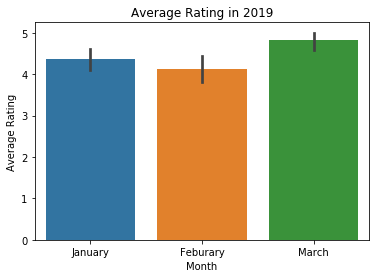

In [19]:
sns.barplot(df['month'][df['year']==2019] , df['rating'] )
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.title('Average Rating in 2019')
plt.xticks([0,1,2],labels=['January','Feburary','March'])
plt.show()

<h5> Total 5-Star Ratings

In [20]:
df[df['rating']==5.0].count()[1]

99

<h5> Ratings below 4.0

In [21]:
df[df['rating']<4].count()[1]

14

Text(0, 0.5, 'Reviews')

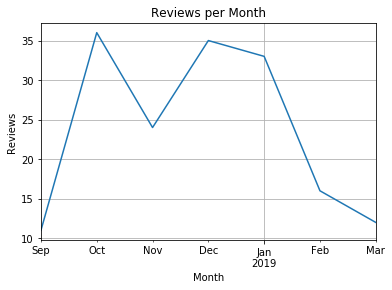

In [22]:
df.resample('1m',on='date').size().plot()
plt.grid(True)
plt.title('Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Reviews')

In [23]:
df['text'][df['text']=='NA'] = np.NaN

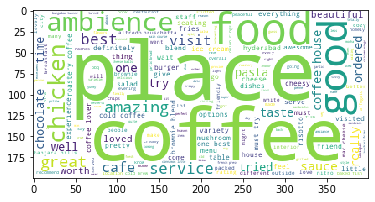

In [29]:
from wordcloud import WordCloud
ip_string=' '.join(df['text'].str.replace('RATED',' ').dropna().to_list())

wc=WordCloud(background_color='white').generate(ip_string.lower())
plt.imshow(wc)
plt.show()

---

## DashBoard

![caption](ZomatoRestaurantProfiling.jpg)

---